## Assignment:

Deadline : 09.03.2016 Wed  18:59

* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of vehicles in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.

$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


* Fit an AR model to each data sequence 
$$
y_i = w_1 y_{i-1} + \epsilon_i
$$

Which model would you prefer? Polynomial or AR?

For each model, plot the data and your model fit $f = A w^*$

### Bonus: 
Use cross validation for finding the best polynomial order and describe you approach.



# Output

Student Name : Talat Aydın Çıkıkcı

# Get Data

In [28]:
%matplotlib inline

import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'data/arac.csv',sep=';')
df_arac

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
0,1966,231977,91469,10913,12041,31462,47931,32099,3610,2452,NaN
1,1967,284194,112367,16008,13332,39927,56889,39647,3641,2383,NaN
2,1968,318768,125375,18967,13948,43441,62616,47062,4033,3326,NaN
3,1969,354398,137345,20540,15529,48655,69478,52959,4568,5324,NaN
4,1970,369808,137771,20916,15980,52152,70730,60994,5070,6195,NaN
5,1971,403880,153676,22380,17140,57011,73433,68417,5349,6474,NaN
6,1972,460087,187272,25559,18504,62796,78920,74402,5747,6887,NaN
7,1973,543318,240360,30055,20011,71043,86780,80860,6420,7789,NaN
8,1974,647947,313160,34122,21404,81025,95309,86028,7338,9561,NaN
9,1975,785920,403546,40623,23763,98579,108381,91421,8450,11157,NaN


# For Cars

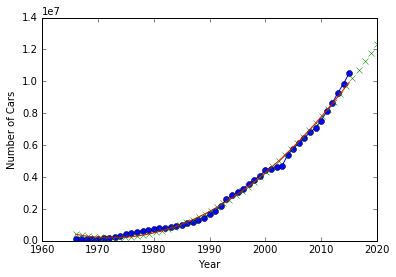

Number of Cars in 2016: [[ 409518.53049776]]
Number of Cars in 2017: [[ 339753.65798613]]
Number of Cars in 2018: [[ 283063.69501606]]
Number of Cars in 2019: [[ 239448.64158755]]
Number of Cars in 2020: [[ 208908.49770061]]


In [44]:
BaseYear = 1966
degree = 2

predictYear = [2016,2017,2018,2019,2020]

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Car[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = len(x) + 5
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.plot(x+BaseYear, f, 'r')
plt.plot(x_2+BaseYear, f_2, 'gx')

plt.xlabel('Year')
plt.ylabel('Number of Cars')

plt.show()

for i in range(len(predictYear)):
    print('Number of Cars in %s: %s' % (predictYear[i],f_2[i]))

# For Minibuses

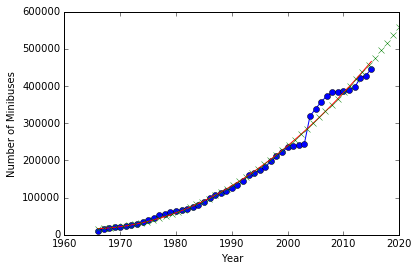

Number of Minibuses in 2016: [[ 16545.19330317]]
Number of Minibuses in 2017: [[ 17429.56186063]]
Number of Minibuses in 2018: [[ 18738.32164456]]
Number of Minibuses in 2019: [[ 20471.47265496]]
Number of Minibuses in 2020: [[ 22629.01489183]]


In [45]:
BaseYear = 1966
degree = 2

predictYear = [2016,2017,2018,2019,2020]

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Minibus[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = len(x) + 5
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.plot(x+BaseYear, f, 'r')
plt.plot(x_2+BaseYear, f_2, 'gx')

plt.xlabel('Year')
plt.ylabel('Number of Minibuses')

plt.show()

for i in range(len(predictYear)):
    print('Number of Minibuses in %s: %s' % (predictYear[i],f_2[i]))

# For Buses

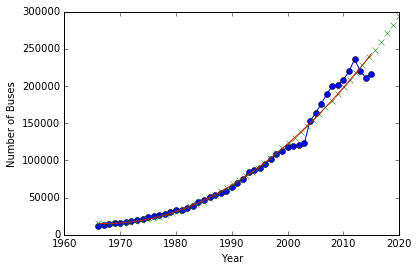

Number of Buses in 2016: [[ 15315.54199095]]
Number of Buses in 2017: [[ 15144.98010047]]
Number of Buses in 2018: [[ 15218.15725332]]
Number of Buses in 2019: [[ 15535.07344951]]
Number of Buses in 2020: [[ 16095.72868902]]


In [46]:
BaseYear = 1966
degree = 2

predictYear = [2016,2017,2018,2019,2020]

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Bus[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = len(x) + 5
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.plot(x+BaseYear, f, 'r')
plt.plot(x_2+BaseYear, f_2, 'gx')

plt.xlabel('Year')
plt.ylabel('Number of Buses')

plt.show()

for i in range(len(predictYear)):
    print('Number of Buses in %s: %s' % (predictYear[i],f_2[i]))

# For Small Trucks

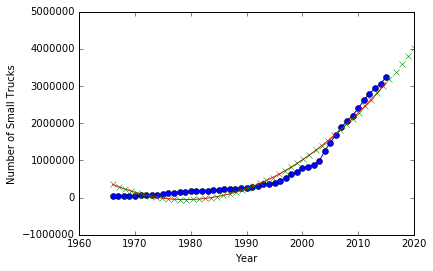

Number of Small Trucks in 2016: [[ 355870.75846155]]
Number of Small Trucks in 2017: [[ 289441.40425079]]
Number of Small Trucks in 2018: [[ 228893.88236521]]
Number of Small Trucks in 2019: [[ 174228.19280483]]
Number of Small Trucks in 2020: [[ 125444.33556964]]


In [47]:
BaseYear = 1966
degree = 2

predictYear = [2016,2017,2018,2019,2020]

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.SmallTruck[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = len(x) + 5
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.plot(x+BaseYear, f, 'r')
plt.plot(x_2+BaseYear, f_2, 'gx')

plt.xlabel('Year')
plt.ylabel('Number of Small Trucks')

plt.show()

for i in range(len(predictYear)):
    print('Number of Small Trucks in %s: %s' % (predictYear[i],f_2[i]))

# For Trucks

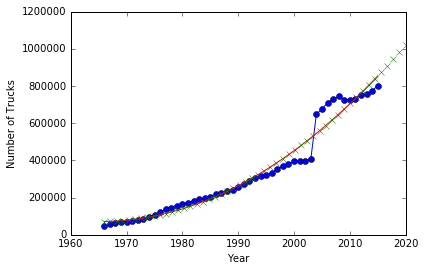

Number of Trucks in 2016: [[ 71443.99900452]]
Number of Trucks in 2017: [[ 72258.22096617]]
Number of Trucks in 2018: [[ 73845.18097524]]
Number of Trucks in 2019: [[ 76204.87903175]]
Number of Trucks in 2020: [[ 79337.3151357]]


In [48]:
BaseYear = 1966
degree = 2

predictYear = [2016,2017,2018,2019,2020]

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Truck[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = len(x) + 5
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.plot(x+BaseYear, f, 'r')
plt.plot(x_2+BaseYear, f_2, 'gx')

plt.xlabel('Year')
plt.ylabel('Number of Trucks')

plt.show()

for i in range(len(predictYear)):
    print('Number of Trucks in %s: %s' % (predictYear[i],f_2[i]))

# For Motorcycles

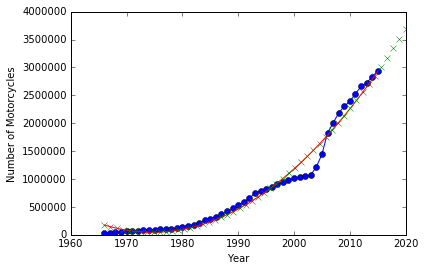

Number of Motorcycles in 2016: [[ 176500.13158372]]
Number of Motorcycles in 2017: [[ 144996.13998887]]
Number of Motorcycles in 2018: [[ 117787.31077858]]
Number of Motorcycles in 2019: [[ 94873.64395284]]
Number of Motorcycles in 2020: [[ 76255.13951167]]


In [49]:
BaseYear = 1966
degree = 2

predictYear = [2016,2017,2018,2019,2020]

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Motorcycle[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = len(x) + 5
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.plot(x+BaseYear, f, 'r')
plt.plot(x_2+BaseYear, f_2, 'gx')

plt.xlabel('Year')
plt.ylabel('Number of Motorcycles')

plt.show()

for i in range(len(predictYear)):
    print('Number of Motorcycles in %s: %s' % (predictYear[i],f_2[i]))

# For Special Vehicles

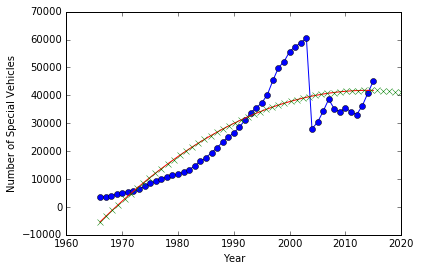

Number of Special Vehicles in 2016: [[-5435.4600905]]
Number of Special Vehicles in 2017: [[-3294.93705778]]
Number of Special Vehicles in 2018: [[-1204.07030246]]
Number of Special Vehicles in 2019: [[ 837.14017545]]
Number of Special Vehicles in 2020: [[ 2828.69437596]]


In [50]:
BaseYear = 1966
degree = 2

predictYear = [2016,2017,2018,2019,2020]

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.SpecialVehicles[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = len(x) + 5
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.plot(x+BaseYear, f, 'r')
plt.plot(x_2+BaseYear, f_2, 'gx')

plt.xlabel('Year')
plt.ylabel('Number of Special Vehicles')

plt.show()

for i in range(len(predictYear)):
    print('Number of Special Vehicles in %s: %s' % (predictYear[i],f_2[i]))

# For Machinery

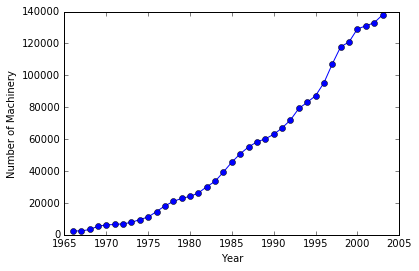

Number of Machinery in 2016: [[ nan]]
Number of Machinery in 2017: [[ nan]]
Number of Machinery in 2018: [[ nan]]
Number of Machinery in 2019: [[ nan]]
Number of Machinery in 2020: [[ nan]]


In [51]:
BaseYear = 1966
degree = 2

predictYear = [2016,2017,2018,2019,2020]

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Machinery[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = len(x) + 5
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.plot(x+BaseYear, f, 'r')
plt.plot(x_2+BaseYear, f_2, 'gx')

plt.xlabel('Year')
plt.ylabel('Number of Machinery')

plt.show()

for i in range(len(predictYear)):
    print('Number of Machinery in %s: %s' % (predictYear[i],f_2[i]))

# For Tractors

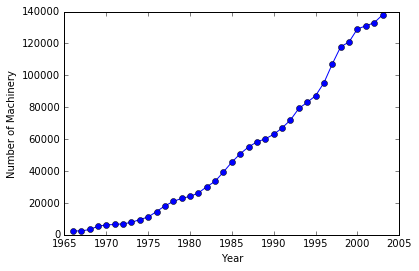

Number of Machinery in 2016: [[ nan]]
Number of Machinery in 2017: [[ nan]]
Number of Machinery in 2018: [[ nan]]
Number of Machinery in 2019: [[ nan]]
Number of Machinery in 2020: [[ nan]]


In [52]:
BaseYear = 1966
degree = 2

predictYear = [2016,2017,2018,2019,2020]

x = np.matrix(df_arac.Year[0:]).T-BaseYear
y = np.matrix(df_arac.Machinery[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = len(x) + 5
f = A*w_ls
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x+BaseYear, y, 'o-')
plt.plot(x+BaseYear, f, 'r')
plt.plot(x_2+BaseYear, f_2, 'gx')

plt.xlabel('Year')
plt.ylabel('Number of Machinery')

plt.show()

for i in range(len(predictYear)):
    print('Number of Machinery in %s: %s' % (predictYear[i],f_2[i]))